### 📦 Cell 1 — Import libraries
This cell loads the Python libraries we’ll need:
- **pandas** — for working with tabular data  
- **numpy** — for numeric calculations  
- **matplotlib** — for making plots  
- **statsmodels** — for running statistical tests (ANOVA, post-hoc tests)

Always run this cell first so everything is available.


In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
 

### 🧠 Cell 2 — Load and Clean the Dataset

This cell does three important things:

1. **Loads the Excel file**  
   - We use `pd.read_excel()` to import the data file that contains both WT and ORXKO mouse data.  
   - The argument `sheet_name="WT VS ORXKO DATA"` tells Python to read only that sheet from the Excel file.  
   - After loading, the file becomes a pandas DataFrame called `data`.

2. **Cleans up the group names**  
   - In the Excel file, the “Group” column contains long text strings like  
     `"Data for WT Mice"` and `"ORXKO FILES COLLECTION"`.  
   - To make things cleaner (and easier for plotting and statistics), we rename them using the `.replace()` function:  
     - `"Data for WT Mice"` → `"WT"`  
     - `"ORXKO FILES COLLECTION"` → `"ORXKO"`

3. **Confirms that the data loaded correctly**  
   - `print()` statements give feedback that everything worked.  
   - `.unique()` checks the “Group” column to make sure both WT and ORXKO appear.  
   - `display(data)` shows majority of data.

✅ **In short:** this cell loads the Excel file, cleans the labels, and checks that the dataset is ready to use.


In [26]:
# Load the Excel file that contains both WT and ORXKO data
data = pd.read_excel("data/Tutorial 7 Data.xlsx", sheet_name="WT VS ORXKO DATA")

# Clean up the group column
data["Group"] = data["Group"].replace({
    "Data for WT Mice": "WT",
    "Data for ORX-KO Mice": "ORXKO"
})

print("✅ Data loaded successfully!")
print("Groups found:")

display(data)

✅ Data loaded successfully!
Groups found:


,Group,Mouse,Percent_Time_AW,Percent_Time_QW,Percent_Time_NREM,Percent_Time_REM,Bouts_AW,Bouts_QW,Bouts_NREM,Bouts_REM,...,ENTROPY_NREM,ENTROPY_REM,EMG_ENTROPY_AW,EMG_ENTROPY_QW,EMG_ENTROPY_NREM,EMG_ENTROPY_REM,EMG_TWITCH_AW,EMG_TWITCH_QW,EMG_TWITCH_NREM,EMG_TWITCH_REM
0,WT,503 WT,20.925926,5.879630,61.342593,11.851852,36,74,73,18,...,-1.256535,0.757991,-0.337946,0.378630,0.120275,-0.213667,2.281811,-0.389278,-0.617051,-0.641984
1,WT,504 WT,32.372093,7.906977,54.139535,5.581395,59,92,75,8,...,-1.542891,-0.263649,-1.085955,0.696347,0.734383,-1.811466,1.237197,-0.512871,-0.601787,-0.611843
2,WT,506 WT,20.694444,6.111111,61.666667,11.527778,33,74,74,16,...,-1.263712,0.786932,-0.348181,0.363633,0.121029,-0.215153,2.325416,-0.326588,-0.626421,-0.650434
3,WT,524 WT,35.416667,6.574074,52.222222,5.787037,33,69,50,7,...,-1.809570,-0.214227,-0.423973,0.357864,0.333842,-0.824407,0.692910,-0.193557,-0.400939,-0.402657
4,WT,342 WT,6.509695,6.786704,74.007387,12.696214,27,49,65,23,...,-0.141695,-0.381064,-0.222688,-0.035794,0.066364,-0.253528,3.343559,-0.664441,-0.077234,-0.908956
5,WT,344 WT,46.666667,5.138889,41.111111,7.083333,59,76,72,15,...,-2.075205,-0.002399,0.630924,0.470203,-0.388532,-2.242796,1.933734,-1.125084,-1.749408,-1.770230
6,ORXKO,313 ORXKO,36.527778,6.712963,48.101852,8.657407,95,95,101,21,...,-1.417125,0.866130,2.081880,1.137381,-1.256194,-2.686299,1.867203,-0.878060,-1.100021,-1.085470
7,ORXKO,314 ORXKO,46.898148,5.694444,40.879630,6.527778,83,80,92,12,...,-1.770540,1.084876,1.452450,-0.051950,-1.273948,-2.411676,0.191852,-0.109831,-0.159565,-0.283274
8,ORXKO,345 ORXKO,28.703704,11.296296,50.092593,9.907407,91,106,85,18,...,-1.029902,0.618277,0.104629,1.187953,-0.194778,-0.672809,1.220199,-0.497265,-0.482990,-0.526148
9,ORXKO,505 ORXKO,31.203704,6.805556,54.814815,7.175926,81,95,100,14,...,-1.536829,0.684926,3.345344,1.545289,-1.703602,-2.999060,2.152972,-0.800441,-0.994743,-1.004275


# Compute Descriptive Statistics (Means and Standard Deviations)

Before we perform any statistical tests, it’s important to summarize our data by calculating:

The average (mean) Total % of each sleep state for both WT and ORXKO mice.

The standard deviation (SD), which tells us how much individual mice vary around that average. 
data → our full dataset

### Explantation of Code

data["Group"]=="WT" → creates a filter showing which rows belong to WT mice

data[data["Group"]=="WT"] → applies that filter, keeping WT rows only

[Total] → selects only the columns with sleep-state total %

.mean() → computes the average for each sleep state

The same structure is used for .std() to compute standard deviations.

In [32]:
# ---- Define variables ----
Percent_Time_ = ["Percent_Time_AW", "Percent_Time_QW", "Percent_Time_NREM", "Percent_Time_REM"]

# ---- Compute group statistics ----
wt_means = data[data["Group"]=="WT"][Percent_Time_].mean()
orxko_means = data[data["Group"]=="ORXKO"][Percent_Time_].mean()

wt_std = data[data["Group"]=="WT"][Percent_Time_].std()
orxko_std = data[data["Group"]=="ORXKO"][Percent_Time_].std()

print("✅ Descriptive statistics computed!\n")
display(pd.DataFrame({"WT Mean": wt_means, "ORXKO Mean": orxko_means,
                      "WT SD": wt_std, "ORXKO SD": orxko_std}))



✅ Descriptive statistics computed!



,WT Mean,ORXKO Mean,WT SD,ORXKO SD
Percent_Time_AW,27.097582,32.878086,14.020894,7.771239
Percent_Time_QW,6.399564,7.469136,0.937599,1.978682
Percent_Time_NREM,57.414919,51.705247,11.066349,6.724123
Percent_Time_REM,9.087935,7.947531,3.280912,1.221263


## Step 7 — Preparing Data and Running a Two-Way ANOVA

In this step, we reformat our dataset and perform a two-way ANOVA (Analysis of Variance) to test whether group (WT vs ORXKO), sleep state (AW, QW, NREM, REM), or their interaction affects whatever variable we are testing (Percent of time, bouts, duration ect).



### Let’s unpack this line by line:

data.melt(...)
The melt() function converts the dataset from wide to long format, which is required for most statistical models in Python.

id_vars=["Mouse", "Group"]
These columns stay the same — they identify each observation (which mouse and which group).

value_vars=Dur
This tells Python which columns to “unfold” — in this case, the percent of time for each sleep state (Percent_Time_AW, Percent_Time_QW, Percent_Time_NREM, Percent_Time_REM).

var_name="State"
Creates a new column called State, showing which sleep state each measurement belongs to.

value_name="Percent_Time"
Creates a new column called Percent_Time, holding the actual Percent of time spent values.

stats_data["State"].str.replace("Dur_", "")
Cleans up the state names so they read as "AW", "QW", "NREM", "REM" instead of "Dur_AW", etc.

#### Result: Now each row represents one measurement for one mouse in one sleep state.
This “long” format is perfect for feeding into statistical tests.


### Coding for 2-Way Anova 

#### Build and fit the model
model = ols("Dur ~ C(Group) * C(State)", data=stats_data).fit()

#Turn that fitted model into a two-way ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

#Line by line explanation 

ols(...) – Ordinary Least Squares. We specify a model formula using R-style syntax.

"Dur ~ ..." → Dependent variable is Dur (the thing we’re measuring: could be duration, Bouts, totals, etc.).

C(Group) → treat Group (e.g., WT vs ORXKO) as a categorical factor.

C(State) → treat State (e.g., AW, QW, NREM, REM) as a categorical factor.

C(Group) * C(State) → between the factors expands to:
C(Group) + C(State) + C(Group):C(State)
i.e., both main effects and their interaction (this is what makes it a two-way ANOVA).

.fit() – estimates the model on the rows of stats_data (our long/tidy table with columns Mouse, Group, State, and Dur).

sm.stats.anova_lm(model, typ=2) – computes the ANOVA table (Type II sums of squares; standard when factors are categorical and the design is reasonably balanced).

### The ANOVA table has one row per effect:

C(Group) – main effect of genotype (collapsed across states).

C(State) – main effect of sleep state (collapsed across groups).

C(Group):C(State) – interaction: whether the group difference changes across states.

Residual – leftover (unexplained) variance.

#### Typical columns include:

sum_sq – variance explained by that effect

df – degrees of freedom

F – F statistic for that effect

PR(>F) – p-value (smaller → stronger evidence the effect is real)

### How to interpret the ANOVA table (hypothetical guidance)

Use the p-value in the PR(>F) column for each effect:

#### Main effect of Group (C(Group))

If p < 0.05: There is a significant difference in overall sleep duration between WT and ORXKO mice.
→ The two genotypes have meaningfully different average durations when you look across all sleep states combined.

If p ≥ 0.05: no clear overall group difference.

#### Main effect of State (C(State))

If p < 0.05: There are very strong differences among sleep states (AW, QW, NREM, REM).
→ This is expected: the amount of time spent in each state is naturally very different.

#### Interaction (C(Group):C(State))

If p < 0.05: The interaction between Group and State is not significant.
→ This means the pattern of percent of time spent across states is similar for both WT and ORXKO mice — even though their total percentages differ, the relative distribution among states doesn’t change much.

If p ≥ 0.05: the pattern across states is similar for both groups; any group difference is fairly consistent across states.

#### Residual

Not a hypothesis test; it’s the remaining variability not explained by the factors above.

In [35]:
# ---- Reshape data to long format for ANOVA ----
stats_data = data.melt(id_vars=["Mouse", "Group"],
                    value_vars=Percent_Time_,
                    var_name="State",
                    value_name="Percent_Time_")
stats_data["State"] = stats_data["State"].str.replace("Percent_Time_", "")

# ---- Two-way ANOVA ----
model = ols("Percent_Time_~ C(Group) * C(State)", data=stats_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("📊 Two-way ANOVA results:\n")
display(anova_table)


📊 Two-way ANOVA results:



,sum_sq,df,F,PR(>F)
C(Group),5.159812e-26,1.0,9.345250e-28,1.000000e+00
C(State),1.796052e+04,3.0,1.084313e+02,2.988237e-19
C(Group):C(State),2.053773e+02,3.0,1.239904e+00,3.079648e-01
Residual,2.208528e+03,40.0,NaN,NaN


### Bonferroni Post-hoc Test

This code performs pairwise statistical comparisons between the two experimental groups (WT and ORXKO) across each sleep state (AW, QW, NREM, and REM) and then applies a Bonferroni correction to control for multiple comparisons.

### Step-by-Step Code Breakdown

#### User Input
variable = "Bouts"
groups = ["WT", "ORXKO"]
##### These variables define which measure is being tested (e.g., “Bouts”, “Duration”, or “Total”) and which two groups are being compared.
WT = wild-type control mice
ORXKO = orexin knockout mice

#### Looping through each sleep state: The code iterates over all states (AW, QW, NREM, and REM) to perform comparisons for each state separately.
for state in stats_data["State"].unique():

##### Within each iteration: This filters the data for the current state (for example, “NREM”) and extracts the “Bouts” column for each group. 
subset = stats_data[stats_data["State"] == state]
wt = subset[subset["Group"] == groups[0]]["Bouts"]
orxko = subset[subset["Group"] == groups[1]]["Bouts"]

### 3. Running the independent t-test
#### For each state, an independent t-test compares whether the mean number of bouts differs between WT and ORXKO mice.
#### The t-value (t_stat) shows the magnitude and direction of the difference.
#### The p-value (p_val) shows the probability that the difference occurred by chance.
#### equal_var=False uses Welch’s t-test, which does not assume equal variances between groups.
#### t_stat, p_val = ttest_ind(wt, orxko, equal_var=False)

t_stat, p_val = ttest_ind(wt, orxko, equal_var=False)

### Applying the Bonferroni correction

_, pvals_corr, _, _ = multipletests(raw_pvals, alpha=0.05, method="bonferroni")

#### The Bonferroni correction adjusts p-values to reduce the chance of false positives when multiple comparisons are made.
#### Without correction, running many t-tests increases the risk of Type I error (finding a “significant” effect by random chance).
#### The Bonferroni method divides the desired significance level (α = 0.05) by the number of comparisons, making it harder to call results significant.
#### The corrected p-values are stored in pvals_corr.









 

In [36]:
import pandas as pd
from scipy.stats import ttest_ind          # <-- needed for the t-tests
from statsmodels.stats.multitest import multipletests  # <-- for Bonferroni


# ---- USER INPUT ----
variable = "Percent_Time_"  # Change to "Bouts", "Total", etc., depending on what you’re testing
groups = ["WT", "ORXKO"]

print(f"===== Bonferroni Post-hoc for {variable} =====")

# Collect p-values and t-stats
t_stats, raw_pvals = [], []

# Step 1: Run t-tests for each state (AW, QW, NREM, REM)
for state in stats_data["State"].unique():
    subset = stats_data[stats_data["State"] == state]
    wt = subset[subset["Group"] == groups[0]]["Percent_Time_"]
    orxko = subset[subset["Group"] == groups[1]]["Percent_Time_"]
    
    # Independent t-test
    t_stat, p_val = ttest_ind(wt, orxko, equal_var=False)
    t_stats.append(t_stat)
    raw_pvals.append(p_val)

# Step 2: Bonferroni correction
_, pvals_corr, _, _ = multipletests(raw_pvals, alpha=0.05, method="bonferroni")

# Step 3: Formatted output
for i, state in enumerate(stats_data["State"].unique()):
    sig_label = "sig" if pvals_corr[i] < 0.05 else "ns"
    print(f"{variable}_{state:5s} | {groups[0]} vs {groups[1]} | "
          f"t={t_stats[i]:6.3f}, raw p={raw_pvals[i]:.4f}, Bonf p={pvals_corr[i]:.4f}, {sig_label}")
    
# Store Bonferroni-corrected p-values for graph
bonferroni_results = dict(zip(stats_data["State"].unique(), pvals_corr))


===== Bonferroni Post-hoc for Percent_Time_ =====
Percent_Time__AW    | WT vs ORXKO | t=-0.883, raw p=0.4035, Bonf p=1.0000, ns
Percent_Time__QW    | WT vs ORXKO | t=-1.197, raw p=0.2697, Bonf p=1.0000, ns
Percent_Time__NREM  | WT vs ORXKO | t= 1.080, raw p=0.3107, Bonf p=1.0000, ns
Percent_Time__REM   | WT vs ORXKO | t= 0.798, raw p=0.4537, Bonf p=1.0000, ns


/tmp/ipykernel_503/3195554736.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = max(wt_means[i], orxko_means[i]) + 6


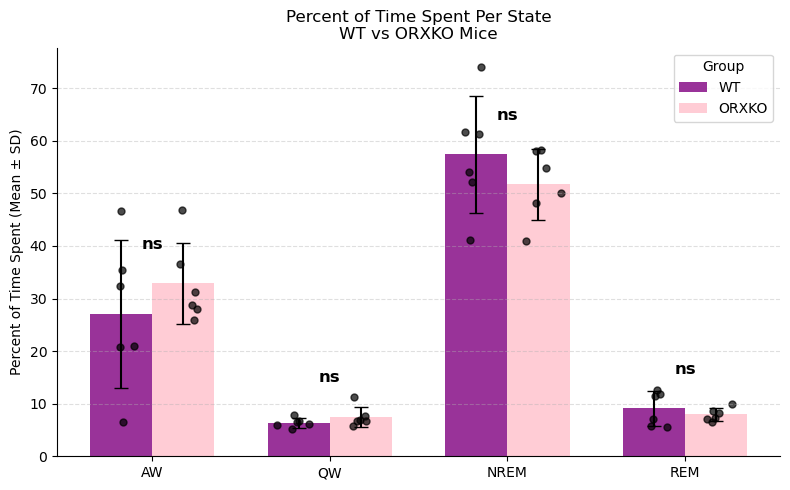

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# ---- Define states ----
Percent_Time_ = ["Percent_Time_AW", "Percent_Time_QW", "Percent_Time_NREM", "Percent_Time_REM"]

# ---- Compute group means / SDs ----
wt_means = data[data["Group"]=="WT"][Percent_Time_].mean()
orxko_means = data[data["Group"]=="ORXKO"][Percent_Time_].mean()
wt_std = data[data["Group"]=="WT"][Percent_Time_].std()
orxko_std = data[data["Group"]=="ORXKO"][Percent_Time_].std()

# ---- Plot setup ----
x = np.arange(len(Percent_Time_))
width = 0.35
fig, ax = plt.subplots(figsize=(8,5))

bars1 = ax.bar(x - width/2, wt_means, width, yerr=wt_std,
               capsize=5, label="WT", color="purple", alpha=0.8)
bars2 = ax.bar(x + width/2, orxko_means, width, yerr=orxko_std,
               capsize=5, label="ORXKO", color="pink", alpha=0.8)

# ---- Scatter data ----
for i, col in enumerate(Percent_Time_):
    y_wt = data[data["Group"]=="WT"][col]
    x_wt = np.random.normal(i - width/2, 0.04, size=len(y_wt))
    plt.scatter(x_wt, y_wt, color="black", s=25, alpha=0.7)

    y_orx = data[data["Group"]=="ORXKO"][col]
    x_orx = np.random.normal(i + width/2, 0.04, size=len(y_orx))
    plt.scatter(x_orx, y_orx, color="black", s=25, alpha=0.7)

# ---- Add significance stars using SAVED Bonferroni p-values ----
def p_to_stars(p):
    if p < 0.001: return "***"
    elif p < 0.01: return "**"
    elif p < 0.05: return "*"
    else: return "ns"

# Extract correct Bonferroni p-values per state name
state_labels = ["AW", "QW", "NREM", "REM"]
pvals_bonf = [bonferroni_results[state] for state in state_labels]

for i, p in enumerate(pvals_bonf):
    stars = p_to_stars(p)
    y = max(wt_means[i], orxko_means[i]) + 6
    ax.text(i, y, stars, ha="center", va="bottom", fontsize=12, fontweight="bold")

# ---- Aesthetics ----
ax.set_xticks(x)
ax.set_xticklabels(state_labels)
ax.set_ylabel("Percent of Time Spent (Mean ± SD)")
ax.set_title("Percent of Time Spent Per State\nWT vs ORXKO Mice")
ax.legend(title="Group")
ax.spines[['top','right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
